In [20]:
#importing A libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


In [21]:
%cd D:\dataset

D:\dataset


In [28]:
#loading the data
data = pd.read_csv("diabetes.csv")

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
data.shape

(768, 9)

In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
#conversion of a column to string to numerals
convert_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for col in convert_col:
    data[col] = pd.to_numeric(data[col])


In [53]:
#feature selection
feature_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature_col]
y = data.Outcome

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [55]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<AxesSubplot:>

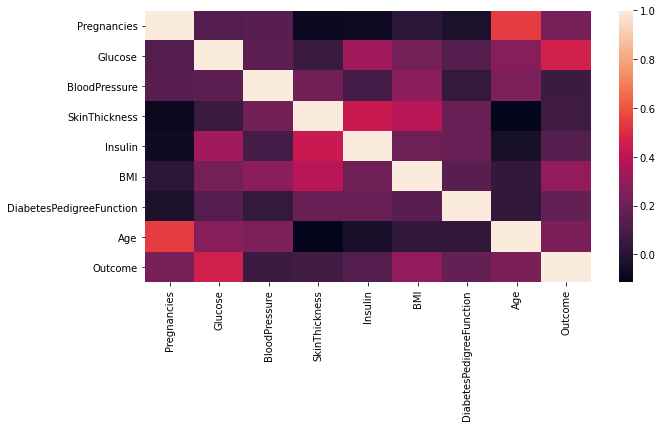

In [56]:
corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr)

In [58]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
#applying the regression
regressor = LogisticRegression()

In [61]:
#fitting the data into training data
regressor.fit(X_train,y_train)
y_prediction = regressor.predict(X_test)

C:\Users\dorwe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn import metrics

array([[78, 21],
       [18, 37]], dtype=int64)

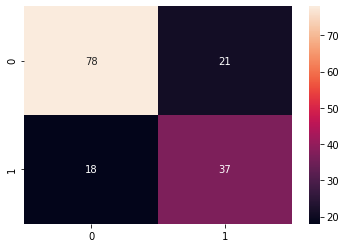

In [73]:
#model evaluation using confusion matrix
conf_mat = metrics.confusion_matrix(y_test,y_prediction)
sns.heatmap(conf_mat,annot = True)
conf_mat

In [77]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_prediction))
print("Precision: ",metrics.precision_score(y_test,y_prediction))
print("Recall: ",metrics.recall_score(y_test,y_prediction))
print(metrics.accuracy_score(y_test,y_prediction)*100,'%','Chances that person having diabetis')

Accuracy:  0.7467532467532467
Precision:  0.6379310344827587
Recall:  0.6727272727272727
74.67532467532467 % Chances that person having diabetis


In [93]:
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,y_prediction, average=None))
print("weighted average: ",f1_score(y_test,y_prediction, average='weighted'))

f1_score:  [0.8        0.65486726]
weighted average:  0.7481668773704172
